## Acceder_a_Bases_de _Datos_de_Bioinformática_con_Biopython

## 1. NCBI

* Brain Derived Neurotrophic Factor, Neurotrophin-4 [Homo sapiens]

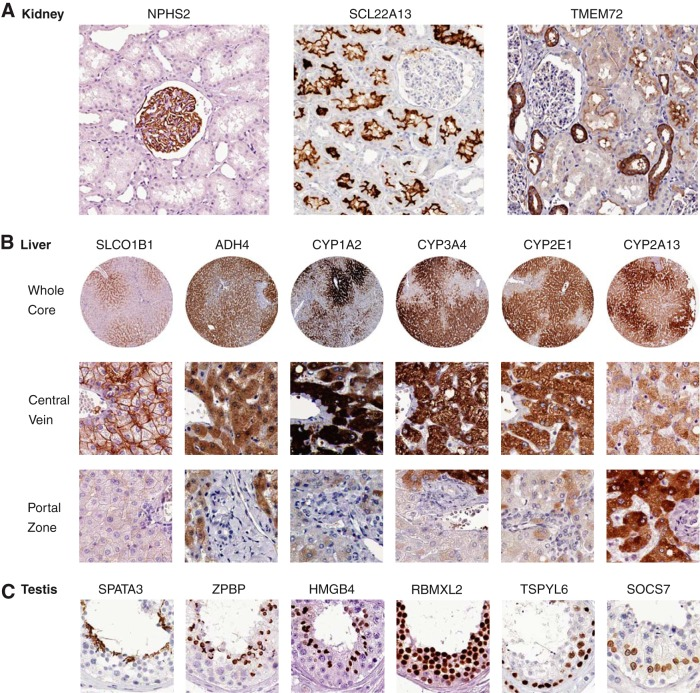

In [1]:
from IPython.display import Image
Image(filename='Imagen_Brain.jpg', width=500, height=500)

Articulo: _Analysis of the Human Tissue-specific Expression by Genome-wide Integration of Transcriptomics and Antibody-based Proteomics_.

In [2]:
#Expression_by_Genome.pdf
from IPython.display import IFrame
IFrame("Expression_by_Genome.pdf", width=600, height=300)

In [3]:
!pip install biopython

In [4]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
#from Bio.Alphabet import IUPAC
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser, MMCIFParser
from Bio.SeqUtils import GC, molecular_weight
#from Bio.Alphabet import generic_dna,generic_rna, generic_protein

### 1. Attributes of Biopython

In [5]:
#Check Attributes of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

### 2. Understand FASTA file format

##### BRAIN
##### Organism(s): Homo sapiens

#### GENETIC MATERIAL

*  **DNA** (Deoxy_Ribonucleic Acid) constitutes of 4 Bases A T G C
*  **RNA** (Ribonucleic Acid) is composed of U instead of T 

### 2.1. FASTA Format

### FASTA File

**>Description_of_DNA_sequence
- ATGCTGCGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAG
- ATGCTGCGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAGCAGAG

### 2.2. Reading from file

In [6]:
#Loading FASTA file
from Bio.Seq import Seq
seq_file_read = next(SeqIO.parse('Gene_brain.fna', 'fasta'))
seq_file_read

SeqRecord(seq=Seq('GATAAGCAACAAGTTCCCCAGCGGTCTTCCCGCCCTAGCCTGACAAGGCGAAGG...AAA'), id='NC_000011.10:c27722030-27654893', name='NC_000011.10:c27722030-27654893', description='NC_000011.10:c27722030-27654893 BDNF [organism=Homo sapiens] [GeneID=627] [chromosome=11]', dbxrefs=[])

In [7]:
type(seq_file_read)

Bio.SeqRecord.SeqRecord

### 2.3. Sequence details

In [8]:
#list sequence details
seq_file_read.id
#seq_file_read.id

'NC_000011.10:c27722030-27654893'

In [11]:
seqfromfile = seq_file_read.seq #Secuencia

In [9]:
#list sequence details
import Bio.SeqIO

for record in Bio.SeqIO.parse('Gene_brain.fna', 'fasta'):
    print(record)

ID: NC_000011.10:c27722030-27654893
Name: NC_000011.10:c27722030-27654893
Description: NC_000011.10:c27722030-27654893 BDNF [organism=Homo sapiens] [GeneID=627] [chromosome=11]
Number of features: 0
Seq('GATAAGCAACAAGTTCCCCAGCGGTCTTCCCGCCCTAGCCTGACAAGGCGAAGG...AAA')
ID: NC_060935.1:c27862460-27795301
Name: NC_060935.1:c27862460-27795301
Description: NC_060935.1:c27862460-27795301 BDNF [organism=Homo sapiens] [GeneID=627] [chromosome=11]
Number of features: 0
Seq('GATAAGCAACAAGTTCCCCAGCGGTCTTCCCGCCCTAGCCTGACAAGGCGAAGG...AAA')


In [10]:
#Store sequence for later analysis
seqfromfile = seq_file_read.seq #Secuencia
seqfromfile

Seq('GATAAGCAACAAGTTCCCCAGCGGTCTTCCCGCCCTAGCCTGACAAGGCGAAGG...AAA')

In [11]:
# Length of sequence
len(seqfromfile)


67138

In [12]:
#molecular weight
from Bio.SeqUtils import molecular_weight

sequence = "ATCGMGCAT"
sequence_without_M = ""

for base in sequence:
    if base != "M":
        sequence_without_M += base

weight = molecular_weight(sequence_without_M)
print(weight)


2489.5901


### 3. Sequence manipulation using Biopython

### 3.1. Indexing /Slicing

In [13]:
# CODON
seqfromfile[0:4]

Seq('GATA')

In [14]:
seqfromfile[0:3] + seqfromfile[-3:]

Seq('GATAAA')

### 3.2. Concatination

In [15]:
concat= seqfromfile[1:7] + seqfromfile[-5:]
concat

Seq('ATAAGCTAAAA')

### 3.3. Codon Search

In [16]:
seqfromfile.find('AGA')

237

### 3.4. GC Content

In [17]:
# LOGIC
(seqfromfile.count('G')+seqfromfile.count('C'))/(len(seqfromfile))*100

40.240996157168816

In [18]:
# GC content using Biopython
GC(seqfromfile)

C:\Users\luzab\anaconda3\lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


40.240996157168816

### 3.5. Complement

* In DNA
* A Bonds with T (DOUBLE BOND)
* G Bonds with G (TRIPLE BOND)

In [19]:
seqfromfile[:11]

Seq('GATAAGCAACA')

In [20]:
# Complement
seqfromfile[:11].complement()

Seq('CTATTCGTTGT')

In [21]:
# Reverse complement
seqfromfile[:11].reverse_complement()

Seq('TGTTGCTTATC')

In [22]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTATGTAC')

### 4.Transcription & Translation Studies 

DNA > RNA = Transcription

mRNA > amino acid (protein) = Translation

### 4.1 Transcription

In [23]:
# Transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('GAUAAGCAAC')

In [24]:
# Back transcribe
mRNA.back_transcribe()

Seq('GATAAGCAACAAGTTCCCCAGCGGTCTTCCCGCCCTAGCCTGACAAGGCGAAGG...AAA')

### 4.2 Translation

In [25]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [26]:
protein_seq = seqfromfile.translate() # Convierte a proteina
protein_seq[:10]

C:\Users\luzab\anaconda3\lib\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('DKQQVPQRSS')

In [27]:
len(protein_seq)

22379

In [28]:
len(seqfromfile)

67138

### Can protein sequences be reverse translated?

_Note_: there iss no function called 'back_translate'so we'll make use of 'back_transcribe'.

In [29]:
protein_seq.back_transcribe()#  Transcripción ARN a proteína

Seq('DKQQVPQRSSRPSLTRRRFSYLATGKSPEPNSASPEPQV*PA*WARERCAG*VF...VHK')

### This error is true for all the biological life too..

-we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same. 

In [30]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [31]:
# Listing the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 2465),
 ('S', 1955),
 ('F', 1383),
 ('K', 1334),
 ('I', 1295),
 ('*', 1266),
 ('G', 1188),
 ('V', 1180),
 ('R', 1154),
 ('P', 1066)]

Text(0, 0.5, 'frequency')

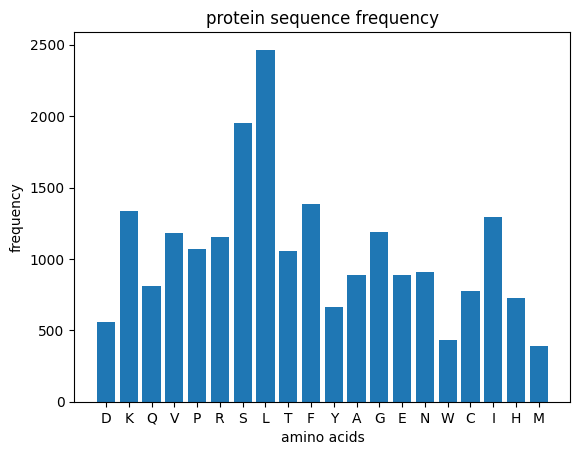

In [32]:
#Visualize all 20 amino acid occurrence in the form of a histogram
del common_amino['*']

pylab.bar(common_amino.keys(),common_amino.values())
pylab.title('protein sequence frequency')

pylab.xlabel('amino acids')
pylab.ylabel('frequency')

### Since stop codon * signifies and of a protein we can split the sequence using (*)

In [33]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['DKQQVPQRSSRPSLTRRRFSYLATGKSPEPNSASPEPQV',
 'PA',
 'WARERCAG',
 'VFFFTGVP',
 'NSSLSLGTFSARTQ',
 'RAVRRQP',
 'ETPAT',
 'QGSWAIIGNLAHSLESRKNSKGNVSLGVRAFA',
 'IYRFFDIDASCFVFCSRQGG',
 'EFKLADIAKGY']

In [34]:
# Convert squences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq':large_proteins})

In [35]:
# Add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,DKQQVPQRSSRPSLTRRRFSYLATGKSPEPNSASPEPQV,39
1,NSSLSLGTFSARTQ,14
2,QGSWAIIGNLAHSLESRKNSKGNVSLGVRAFA,32
3,IYRFFDIDASCFVFCSRQGG,20
4,EFKLADIAKGY,11


In [36]:
# sort sequence data
df.sort_values(by = ['length'],ascending=False)[:10]

,protein_seq,length
207,PGRKAQPGAPGPRRCRRRARAHPPARCPAHPVAPRAPGPDRGASPV...,211
364,NHKNPRRKPRQYHSGHRHGKDFMTKIPKAMATKAKIDKWDLIKLKS...,185
349,RHKKPFKKISESRSWFFEKINKIDRMLARLIKKKREKNQIDAIKDD...,176
22,NQAVEVVCGGERRWRLGRGKEVKLNLQHKKMNQGNFSSSSEKDSFS...,114
270,FHFVILSFCLHVPLKTETMPKLKQVFLSFHMFTYFLNVFLNTDKLL...,111
414,VCTIISPPPHPVFFLRRSLALSPRLECSGTISAHRKLHHFPPFLKQ...,103
536,GDAPPCFGSCSVGCTHCLTSPSEMNPVPQLEMQKSPVFCITHAGGC...,102
560,ALSPFRSAAALDSHRSMSPVVNCTCKGSRLCAPYENPIPYDNLTDD...,97
175,PLFPLEHWVRIILEHNQKEIKIQTNSQLIFKPHKSEIGSIIFSSCE...,97
322,PREALRDCAMRDSAIWPRYYTFPTVFAAGRPGDSLGCLHHQGPGFQ...,92


In [37]:
# let's take a single protein from the table
one_large_protein = df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]
single_prot

'PGRKAQPGAPGPRRCRRRARAHPPARCPAHPVAPRAPGPDRGASPVRPSTSCSGGFNETPTAAVGPAGSSTATGTGAGRWSQNRNHDVTPPPGTREVCVDPEVGKRWEWGLVQELPVRGRELTGGSPTPKLWDEASLLLSSPPVEGTIWSYSWGVFSPIPQPRRSAGTTREKGTRGSHEVEEGRPGGDPELRDGSKDGDPGIPRSPPPAQE'

In [38]:
with open("rcsb_pdb_1B8M.fasta", "w") as file:
    file.write(">large protein\n"+ single_prot)

### 5. Basic Local Alignmente Using NCBI-BLAST

* https://www.ncbi.nlm.nih.gov/protein/1B8M_B?report=fasta
* Chain B, PROTEIN (NEUROTROPHIN-4)

In [ ]:
#help(SeqIO)

In [43]:
# 1B8M_data.pdb
from Bio import SeqIO
read = SeqIO.read("Chain B,_Protein.fasta", "fasta")
read.seq


Seq('GVSETAPASRRGELAVCDAVSGWVTDRRTAVDLRGREVEVLGEVPAAGGSPLRQ...GRA')

In [44]:
%%time
# based on the server load this query might take 2-3 minutes to run
result_handle = NCBIWWW.qblast("blastp", "pdb", read.seq)
blast_qresult = SearchIO.read(result_handle, "blast-xml")

CPU times: total: 15.6 ms
Wall time: 1min 3s


In [45]:
print(blast_qresult[0:5])

Program: blastp (2.14.1+)
  Query: unnamed (130)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|1B8M|B  Brain Derived Neurotrophic Factor, Neurotro...
            1      1  pdb|1B8K|A  Neurotrophin-3 from Human [Homo sapiens]
            2      1  pdb|1BND|B  Structure Of The Brain-Derived Neurotrophic...
            3      1  pdb|1B8M|A  Brain Derived Neurotrophic Factor, Neurotro...
            4      1  pdb|1BND|A  Structure Of The Brain-Derived Neurotrophic...


In [46]:
seqid = blast_qresult[0]

details = seqid[0]

print(f"\
#Sequence ID:{seqid.id}\n\
#description:{seqid.description}\n\
#E value:{details.evalue}\n\
#Bit Score:{details.bitscore}\n\
#")

#Sequence ID:pdb|1B8M|B
#description:Brain Derived Neurotrophic Factor, Neurotrophin-4 [Homo sapiens]
#E value:7.86851e-90
#Bit Score:257.299
#


In [47]:
print(f"alignment:\{details.aln}")

alignment:\Alignment with 2 rows and 130 columns
GVSETAPASRRGELAVCDAVSGWVTDRRTAVDLRGREVEVLGEV...GRA unnamed
GVSETAPASRRGELAVCDAVSGWVTDRRTAVDLRGREVEVLGEV...GRA pdb|1B8M|B


### 6. Reading PDB  file

### 6.1. Retreiving PDB Structure From RCSB PDB

In [49]:
seqid.id

'pdb|1B8M|B'

In [50]:
# split seqid
seqid.id.split('|')[1]

'1B8M'

In [54]:
# link format http://files.rcsb.org/download/1B8M.pdb
import urllib.request
urllib.request.urlretrieve('http://files.rcsb.org/download/1B8M.pdb', 'sequence_data/1B8M.pdb')

('sequence_data/1B8M.pdb', <http.client.HTTPMessage at 0x258869f96f0>)

In [56]:
parser = PDBParser()
structure = parser.get_structure("1B8M","Sequence_data/1B8M.pdb")
structure

C:\Users\luzab\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2133.
  warnings.warn(
C:\Users\luzab\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2171.
  warnings.warn(


<Structure id=1B8M>

### 6.2. Identifying the number of chains

In [57]:
for chain in structure[0]:
    print(f"chain ID: {chain.id}")

chain ID: A
chain ID: B


## 7.Visualizing Brain Derived Neurotrophic Factor, Neurotrophin-4 [Homo sapiens]

### 7.1 nglview

In [59]:
nv.demo()

NGLWidget()

In [60]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [61]:
view.render_image()

Image(value=b'', width='99%')

### 7.2. nglview GUI

In [62]:
#GUI
nv.show_biopython(structure, gui=True)

NGLWidget()

### Observation:

* A. Length 67138 base pairs.
* B. GC content 37.97
* C. Protein content has high L & the largest protein is of length 67138 Amino acid
* D. Largest protein BLAST results corresponds to Brain Derived Neurotrophic Factor, Neurotrophin-4 [Homo sapiens] 1B8M.
* E. Protein 1B8M has 2 chains & a DNA binding domain.

### Protein BLAST

* BRAIN
* Classification: PROTEIN FIBRIL
* Organism(s): Homo sapiens
* Expression System: Escherichia coli BL21(DE3)
* Mutation(s): No 

In [5]:
#help(NCBIWWW)

In [97]:
from Bio.Blast import NCBIWWW
from Bio.Seq import Seq
from Bio import SeqIO, SearchIO

In [98]:
nuc_record.seq #Secuencia

Seq('MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVAT...PEA')

In [99]:
nuc_record.description

'8CYT_1|Chains A, B, C, D, E, F, G, H[auth I], I[auth J], J[auth K], K[auth L], L[auth M], M[auth N], N[auth O]|Alpha-synuclein|Homo sapiens (9606)'

In [100]:
prot_record = SeqIO.read('Sec_alpha_synuclein_fibril_class_A.fasta', format= 'fasta')
len(prot_record)

140

### ENTREZ

In [71]:
#help(Entrez)

In [18]:
from Bio import Entrez

In [19]:
Entrez.email = "laabril@unal.edu.co"
record = Entrez.read(Entrez.einfo())
'pubmed' in record['DbList']    

True

In [20]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record['DbList'] 

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

### PUBMED

In [21]:
handle = Entrez.einfo(db='pubmed')
record = Entrez.read(handle)
record['DbInfo']['Description'] 

'PubMed bibliographic record'

In [22]:
record['DbInfo']['Count']

'35804400'

In [26]:
handle = Entrez.efetch(db='nucleotide', id='35804400',rettype='gp', retmode='text')
print(handle.read())

LOCUS       AACN010786193            851 bp    DNA     linear   MAM 26-SEP-2003
DEFINITION  Canis lupus familiaris breed poodle ctg19866850675290, whole genome
            shotgun sequence.
ACCESSION   AACN010786193 AACN010000000
VERSION     AACN010786193.1
DBLINK      BioProject: PRJNA10628
            BioSample: SAMN03004377
KEYWORDS    WGS.
SOURCE      Canis lupus familiaris (dog)
  ORGANISM  Canis lupus familiaris
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Laurasiatheria; Carnivora; Caniformia; Canidae;
            Canis.
REFERENCE   1  (bases 1 to 851)
  AUTHORS   Kirkness,E.F., Bafna,V., Halpern,A.L., Levy,S., Remington,K.,
            Rusch,D.B., Delcher,A.L., Pop,M., Wang,W., Fraser,C.M. and
            Venter,J.C.
  TITLE     The dog genome: survey sequencing and comparative analysis
  JOURNAL   Science 301 (5641), 1898-1903 (2003)
   PUBMED   14512627
REFERENCE   2  (bases 1 to 851)
  AUTHORS   Kirkness,E., Ba

In [106]:
handle = Entrez.esearch(db='nucleotide', term='accD[gene Name]AND  "E. coli"[0rganism]',rettype='gp', retmmax='20')
result_list=Entrez.read(handle)

In [107]:
id_list = result_list['IdList']
count = result_list['Count']

print(id_list)
print("\n")
print(count)

['2515370606', '2515368003', '2515290092', '2515281576', '2515278413', '2515273227', '2515270741', '2515268212', '2515266247', '2515260841', '2515253891', '2515253844', '2515253743', '2515252020', '2515250662', '2515244942', '2515241819', '2515240479', '2515240037', '2515240017']


279858


In [108]:
handle.close()

### PDB

#### Import Modules

In [91]:
#help(PDBParser)

In [109]:
from Bio.PDB import PDBParser, PDBList

In [110]:
pdbl = PDBList()
pdbl.retrieve_pdb_file("7BYR", file_format="pdb", pdir="dir")

Structure exists: 'dir\pdb7byr.ent' 


'dir\\pdb7byr.ent'

In [111]:
parser = PDBParser()
structure =parser.get_structure("7BYR",'dir\\pdb7byr.ent')

C:\Users\luzab\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26237.
  warnings.warn(
C:\Users\luzab\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26405.
  warnings.warn(
C:\Users\luzab\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26545.
  warnings.warn(


In [112]:
for chain in structure[0]:
    print(f"chainid:{chain.id} ")

chainid:A 
chainid:B 
chainid:C 
chainid:H 
chainid:L 
chainid:D 
chainid:E 
chainid:F 
chainid:G 
chainid:I 
chainid:J 


In [113]:
resolution = structure.header["resolution"]
resolution

3.84

In [114]:
keywords = structure.header["keywords"]
keywords 

'sars-cov-2, antigen, rbd, neutralizing antibody, viral protein'

### EXPASY

###  PROSITE

#### Import Modules

In [117]:
#help(Prosite)

In [118]:
from Bio import ExPASy
from Bio.ExPASy import Prosite

In [119]:
handle = ExPASy.get_prosite_raw('PS51442')
record = Prosite.read(handle)

In [120]:
print(record.description)

Coronavirus main protease (M-pro) domain profile.


In [122]:
print(record.pdb_structs[:10])

['1LVO', '1P9S', '1P9U', '1Q2W', '1UJ1', '1UK2', '1UK3', '1UK4', '1WOF', '1Z1I']


In [123]:
handle = ExPASy.get_prosite_raw('PS00001')
record = Prosite.read(handle)
print(record.pattern)

N-{P}-[ST]-{P}.


### ScanProsite

In [124]:
from Bio.ExPASy import ScanProsite

In [126]:
prot_record = SeqIO.read("Sec_alpha_synuclein_fibril_class_A.fasta", format="fasta" )
len(prot_record.seq)

140

In [131]:
handle = ScanProsite.scan(seq=prot_record.seq, mirror='https://prosite.expasy.org/')
result = ScanProsite.read(handle)

In [132]:
result.n_match

0

In [135]:
if len(result) >= 2:
    # Accede al índice 1 de la lista result
    print(result[1])
else:
    print("La lista result no tiene suficientes elementos.")


La lista result no tiene suficientes elementos.


### KEGG

In [139]:
#help(Enzyme)

In [137]:
from Bio.KEGG import REST, Enzyme

In [141]:
import urllib.request

request = urllib.request.urlopen("http://rest.kegg.jp/get/ec:5.4.2.2")
data = request.read().decode()  # Decodificar los datos

with open("ec_5.4.2.2.txt", "w") as file:
    file.write(data)

In [142]:
records = Enzyme.parse(open("ec_5.4.2.2.txt"))
record = list(records)[0]
record.classname

['Isomerases;',
 'Intramolecular transferases;',
 'Phosphotransferases (phosphomutases)']

In [143]:
record.pathway

[('PATH', 'ec00010', 'Glycolysis / Gluconeogenesis'),
 ('PATH', 'ec00030', 'Pentose phosphate pathway'),
 ('PATH', 'ec00052', 'Galactose metabolism'),
 ('PATH', 'ec00230', 'Purine metabolism'),
 ('PATH', 'ec00500', 'Starch and sucrose metabolism'),
 ('PATH', 'ec00520', 'Amino sugar and nucleotide sugar metabolism'),
 ('PATH', 'ec00521', 'Streptomycin biosynthesis'),
 ('PATH', 'ec01100', 'Metabolic pathways'),
 ('PATH', 'ec01110', 'Biosynthesis of secondary metabolites'),
 ('PATH', 'ec01120', 'Microbial metabolism in diverse environments')]

In [144]:
record.genes[:10]

[('HSA', ['5236', '55276']),
 ('PTR', ['456908', '461162']),
 ('PPS', ['100977295', '100993927']),
 ('GGO', ['101128874', '101131551']),
 ('PON', ['100190836', '100438793']),
 ('NLE', ['100596081', '100600656']),
 ('HMH', ['116456694', '116457795']),
 ('MCC', ['100424648', '699401']),
 ('MCF', ['101925921', '102130622']),
 ('MTHB', ['126935012', '126954887'])]

In [145]:
list_genes = []
for x,y in record.genes:
    list_genes += x.split("\n")
print(list_genes[:10])

['HSA', 'PTR', 'PPS', 'GGO', 'PON', 'NLE', 'HMH', 'MCC', 'MCF', 'MTHB']
